In [1]:
# The Spark Foundation
# Krithika Rangaraj
# Task 2 : Predication using unsupervised ML
# Question : Predict the optimum number of cluster for the given Iris data set

In [58]:
# Import required libaries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [115]:
# Read csv file into pandas dataframe
df = pd.read_csv("C:\\Users\\Krithika\\Desktop\\Iris.csv")
print ('Data imported sucessfully ')
df.head(5)

Data imported sucessfully 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
# DATA WRANGLING--->Droping unwanted columns in the dataset
df = df.drop('Id', axis = 1)

In [83]:
df = df.drop('Species', axis = 1)

In [77]:
print('Dataset after cleaning :\n',df.head(5))

Dataset after droping :
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [94]:
# DATA EXPLORATION
print('Checking for null values :\n', df.isnull().sum())
print('Size of dataset(after  cleaning) is :',df.shape)
print('Statatics summary of dataset is:\n')
df.describe()

checking for null values :
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Size of dataset(after  cleaning) is : (150, 5)
Statatics summary of dataset is:



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [117]:
# Elbow method :----< To find the optimum number of clusters for k-means clustering. 
X = df.iloc[:,[0,1,2,3]].values
print('Input data is :\n',X[0:5])
wcss = []  #Sum of Squares
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)
print('Within cluster sum of square Error is:',wcss[0:5])

Input data is :
 [[1.  5.1 3.5 1.4]
 [2.  4.9 3.  1.4]
 [3.  4.7 3.2 1.3]
 [4.  4.6 3.1 1.5]
 [5.  5.  3.6 1.4]]
Within cluster sum of square Error is: [281831.54466666654, 70581.3808, 31320.711199999994, 17777.809912280707, 11423.238080088988]


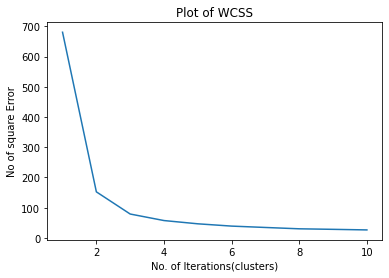

In [110]:
#Plotting the graph to view the elbow 

plt.plot(range(1,11), wcss)
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(X)plt.title("Plot of WCSS")
plt.xlabel("No. of Iterations(clusters)")
plt.ylabel("No of square Error")
plt.show()


In [ ]:
#Question : Predict the optimum number of cluster for the given data set
# Answer : From the above graph ,elbow formed at i =3 and thus the optimum number of clusters is 3.

In [111]:
#Implementing KMeans Clustering
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(X)

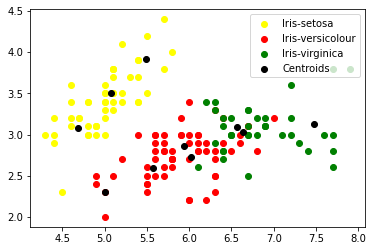

In [114]:
# Plotting the Clusters using Scatterplot.

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], c = 'black', label = 'Centroids')
plt.legend(loc ='upper right')
plt.show()
